# Merge FJMP's Multiple Preprocess Dataset Files From Interaction Dataset into One Dataset

Task breakdown:
* concatenate the padding label data to trajectory

In [2]:
import os, sys
import pickle5
import pickle
import numpy as np
from copy import copy

input_folder_dir = "/mnt/Data/Research_Dataset/interaction_dataset/INTERACTION-Dataset-DR-multi-v1_2/preprocess/fjmp_val_mar11_3/"
output_file_dir = "/mnt/Data/Research_Dataset/interaction_dataset/INTERACTION-Dataset-DR-multi-v1_2/preprocess/fjmp_val_mar11_3/all.p"

## Supporting Functions

In [3]:
# concatenate the padding label data to trajectory
def concat_padding_mask_to_trajectory(data_point):
        
    padding_mask = data_point['has_obss']
    # reshape padding mask from 2D array to 3D array
    padding_mask_3d = padding_mask[:, :, np.newaxis]
    trajectories = data_point['feats']
    
    # concatenation
    masked_trajectories = np.concatenate((trajectories, padding_mask_3d), axis=2)
    
    data_point['feats'] = masked_trajectories
    
    return data_point

## Main Preprocessing

In [4]:
def main():
    output_dataset = []
    
    file_name_list = os.listdir(input_folder_dir)
    
#     for i, file_name in tqdm(enumerate(file_name_list), total=len(file_name_list)):
    for file_name in file_name_list:

        # I made a mistake by emptying the '1.p' file, 
        # so it needs to be re-run the reformating code from FJMP codebase.
        try:
            with open(os.path.join(input_folder_dir, file_name), 'rb') as f:
                data_point = pickle5.load(f)
        except EOFError:
            print(file_name + " is empty.")
            continue

        data_point = concat_padding_mask_to_trajectory(data_point)

        output_dataset.append(data_point)

    with open(output_file_dir, 'wb') as f:
        pickle.dump(output_dataset, f, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
main()

# Testers

In [6]:
with open(output_file_dir, 'rb') as f:
    test_dataset = pickle5.load(f)

In [7]:
test_dataset[10]['feats'].shape

(14, 40, 3)

In [21]:
import os, sys
import pickle5
import pickle


with open(os.path.join(input_folder_dir, '10003.p'), 'rb') as f:
    data_point = pickle5.load(f)

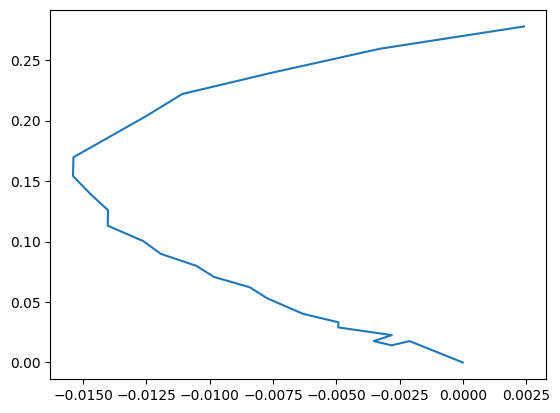

In [22]:
import matplotlib.pyplot as plt
d = data_point['feats'][10,:,:]
plt.plot(d[:,0], d[:,1])

In [23]:
data_point['has_obss']

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
   

In [75]:
data_point.keys()

dict_keys(['idx', 'city', 'feats', 'ctrs', 'orig', 'theta', 'rot', 'feat_locs', 'feat_vels', 'feat_psirads', 'feat_shapes', 'feat_agenttypes', 'gt_preds', 'gt_vels', 'gt_psirads', 'has_preds', 'has_obss', 'ig_labels_sparse', 'ig_labels_dense', 'graph'])

In [79]:
data_point['feats'][3,:]

array([[ 0.0000000e+00,  0.0000000e+00],
       [ 9.4100189e-01,  5.9854507e-02],
       [ 9.3688202e-01,  5.9868813e-02],
       [ 9.3421173e-01,  5.8179855e-02],
       [ 9.3226624e-01,  5.7701111e-02],
       [ 9.3032074e-01,  5.7222366e-02],
       [ 9.2935944e-01,  5.6983948e-02],
       [ 9.2838287e-01,  5.6744576e-02],
       [ 9.2838287e-01,  5.6743622e-02],
       [ 9.2740631e-01,  5.6505203e-02],
       [ 9.2741394e-01,  5.6505203e-02],
       [ 9.2741394e-01,  5.6505203e-02],
       [ 9.2740631e-01,  5.6505203e-02],
       [ 9.2717743e-01,  5.7476044e-02],
       [ 9.2740631e-01,  5.6505203e-02],
       [ 9.2717743e-01,  5.7476044e-02],
       [-7.9741898e+01, -9.1441584e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [ 0.00000

In [111]:
padding_mask = data_point['has_obss']
# reshape it to 3D mask
padding_mask_3d = padding_mask[:, :, np.newaxis]
print(padding_mask_3d.shape)

(13, 40, 1)


In [107]:
trajectories = data_point['feats']
print(trajectories.shape)

(13, 40, 2)


In [117]:
masked_trajectories = np.concatenate((trajectories, padding_mask_3d), axis=2)
print(masked_trajectories.shape)

(13, 40, 3)


In [14]:
with open(os.path.join('/home/jinwei/wise/LaneGCN/dataset/preprocess/val_crs_dist6_angle90.p'), 'rb') as f:
    data_points = pickle5.load(f)

In [87]:
data_points[10].keys()

dict_keys(['idx', 'city', 'feats', 'ctrs', 'orig', 'theta', 'rot', 'gt_preds', 'has_preds', 'graph'])

In [99]:
data_points[10]['gt_preds'].shape

(5, 30, 2)